/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_88888/1137645893.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


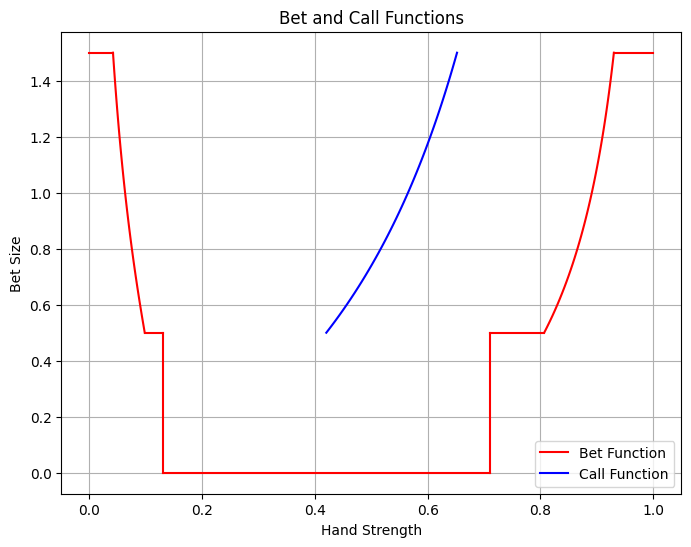

In [1]:
import json
import matplotlib.pyplot as plt

def plot_wolfram_lines(json_files, x_label="x", y_label="y", title="Wolfram Lines", figsize=(8, 6), fig=None, ax=None):
    """
    Plots arbitrary sets of lines exported from Wolfram as JSON files.

    Parameters:
        json_files (list of tuples): List of tuples where each tuple contains the path to a JSON file and its label.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        figsize (tuple): Size of the figure (width, height).
        fig (matplotlib.figure.Figure, optional): Existing figure to plot on. If None, a new figure is created.
        ax (matplotlib.axes.Axes, optional): Existing axes to plot on. If None, new axes are created.
    """
    # Define a list of colors for the plots
    colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray"]

    # Create figure and axes if not provided
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    for idx, (json_file, label) in enumerate(json_files):
        # Load the exported JSON file
        with open(json_file, "r") as file:
            line_data = json.load(file)

        # Plot the lines with the corresponding color and label
        color = colors[idx % len(colors)]  # Cycle through colors if more files than colors
        for i, plot_lines in enumerate(line_data):
            for line in plot_lines:
                x, y = zip(*line)  # Unpack the points into x and y
                ax.plot(x, y, color=color, label=label if i == 0 else "")

    # Set plot limits, labels, and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Return the figure and axes for further customization
    return fig, ax

# Example usage
fig, ax = plot_wolfram_lines(
    json_files=[
        ("betFunction.json", "Bet Function"),
        ("callFunction.json", "Call Function")
    ],
    x_label="Hand Strength",
    y_label="Bet Size",
    title="Bet and Call Functions",
    figsize=(8, 6)
)

fig.show()